Credit Card Fraud Detection::
Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

Description about dataset::
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
WORKFLOW :
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables.

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92% 10.Evaluation Step 11Prediction

Task::
Identify fraudulent credit card transactions.


In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
credit_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')


In [3]:
credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_data.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [5]:
credit_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Balancing Data

In [6]:
non_fraud=credit_data[credit_data["Class"]==0]
fraud = credit_data[credit_data["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [7]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [8]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [9]:
x_data = data.drop(columns="Class", axis=0)
label = data['Class']

Splitting Training & Test Data

In [10]:

train_data, test_data, train_label, test_label = train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [11]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

Normalize the Data

In [12]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

In [13]:
train_label = np.asarray(train_label).astype(dtype="float64")
test_label = np.asarray(test_label).astype(dtype="float64")

Building the Model

In [66]:
model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Training the Model

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the Network

In [68]:
history = model.fit(train_data, train_label, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.7818 - accuracy: 0.4038 - val_loss: 0.6866 - val_accuracy: 0.5435
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5104 - val_loss: 0.6223 - val_accuracy: 0.6014
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.6200 - val_loss: 0.5780 - val_accuracy: 0.7464
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.7383 - val_loss: 0.5381 - val_accuracy: 0.8116
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.8439 - val_loss: 0.4992 - val_accuracy: 0.8478
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.8794 - val_loss: 0.4596 - val_accuracy: 0.8551
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4335 - accuracy: 0.9123 - val_loss: 0.4229 - val_accuracy: 0.8696
Epoch 8/100


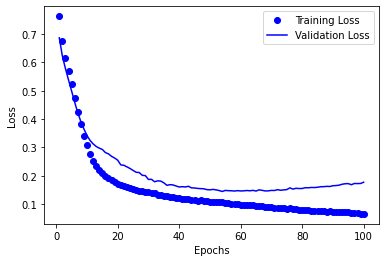

In [69]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

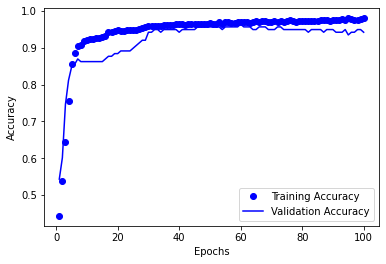

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs[:], acc[:], 'bo', label='Training Accuracy')
plt.plot(epochs[:], val_acc[:], 'b', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluating Network

In [71]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_label)

10/10 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9223


In [72]:
test_acc_score*100

92.22972989082336

Predicting the Value

In [73]:
prediction = model.predict(test_data)


In [74]:
prediction[15:30]

array([[1.        ],
       [1.        ],
       [0.02853888],
       [1.        ],
       [1.        ],
       [0.99981207],
       [0.00818411],
       [1.        ],
       [0.00959566],
       [0.01880771],
       [0.34146923],
       [0.13464835],
       [1.        ],
       [0.0934478 ],
       [0.00494236]], dtype=float32)

In [75]:
test_label[15:30]

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])